# Generate figures

In [92]:
''' Dependencies '''
from sklearn.decomposition import PCA
from tqdm.auto import tqdm
import warnings
import pandas as pd
import numpy as np
import scipy
import sys
import statsmodels.api as sm
from tqdm import tqdm as pbar

# my scripts
from pyaldata import * 
import preprocess
from utils import *

# Plotting
from IPython.display import display, set_matplotlib_formats, HTML
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.colors
import matplotlib.pyplot as plt
import seaborn as sns

cs = ['#43D789', '#801607', '#8DB8ED', '#94B0B6', '#e42c12', '#005CA8', '#127340', '#111851'] # Line colors
cmap = matplotlib.colors.ListedColormap(['#ff9c8d', '#dafce3']) # Color for False and True

sns.set(rc={'figure.figsize':(20, 10)})
sns.set_style('ticks', rc={ 'figure.facecolor': 'none', 'axes.facecolor':'none'})
sns.set_context('notebook', rc={'lines.linewidth':1.5})

%config InlineBackend.figure_format = 'retina'

In [13]:
''' Load dictionaries '''

main_dict = np.load('/Users/Daphne/Data/main_dict.npy', allow_pickle='TRUE').item()
surr_dict = np.load('/Users/Daphne/Data/surr_dict.npy', allow_pickle='TRUE').item()

In [65]:
''' Parameters '''

MONKEY_C = 8
THRESHOLDS_VARE = np.round(np.arange(0.2, 0.95, 0.05), 3)

## 1 Make summary plots

### 1.1 Single category

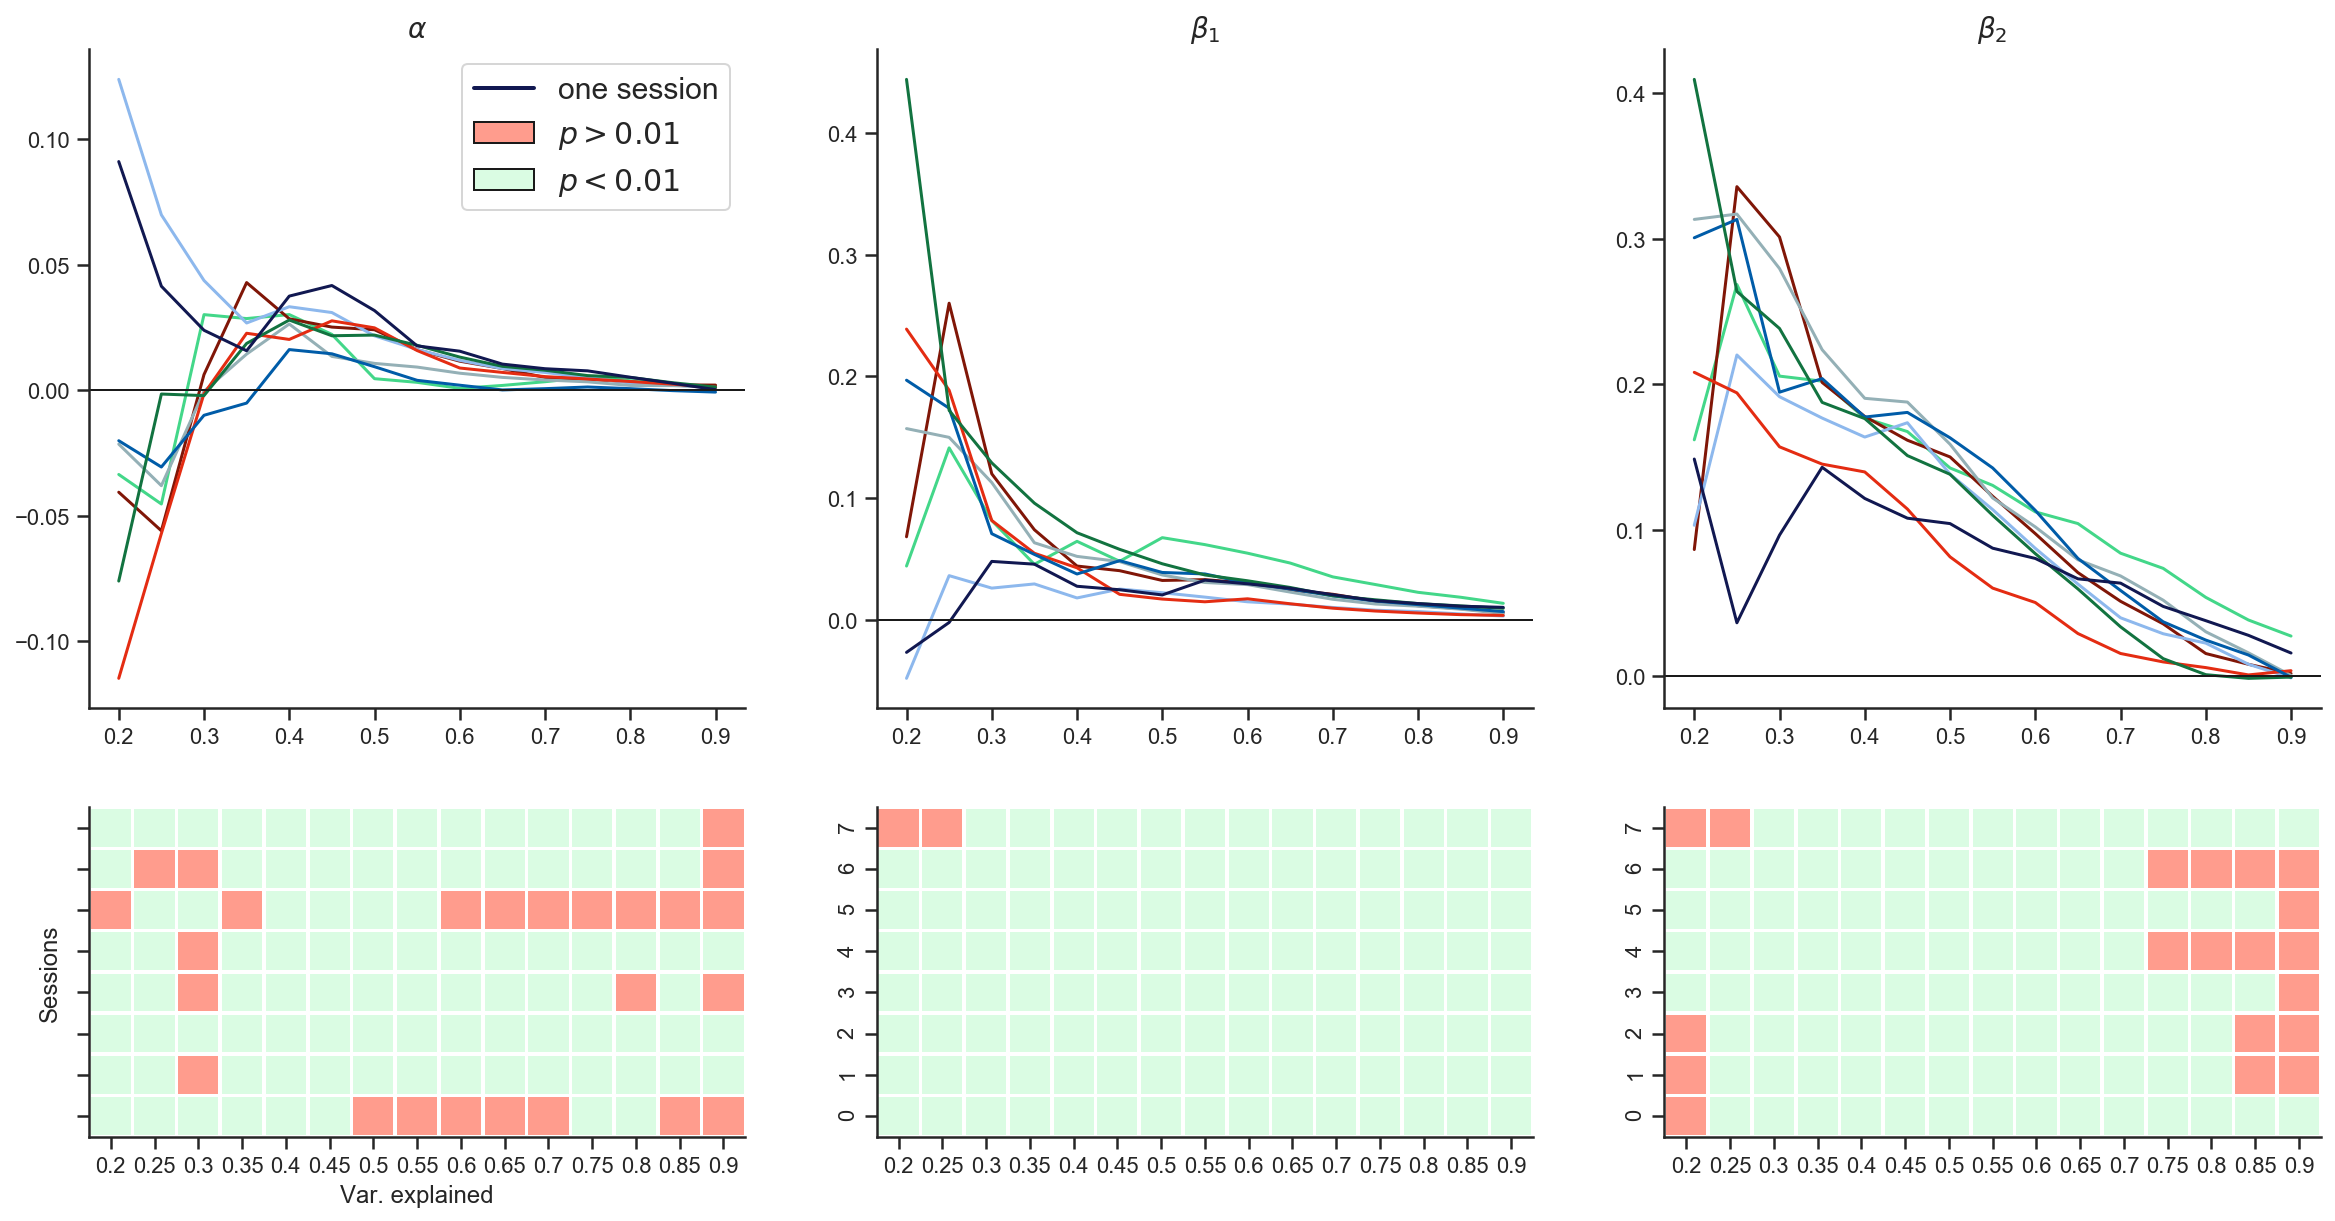

In [106]:
pvals = []

fig, axs = plt.subplots(nrows=2, ncols=3, gridspec_kw={'height_ratios':[2, 1]})

for i, s in enumerate(list(main_dict.keys())[:MONKEY_C]):
    
    # Lineplots for each regressor
    axs[0, 0].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_single_cat'].params[0] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 0].set_title(r'$\alpha$', fontweight='bold', fontsize=14)
    axs[0, 0].axhline(0, color='k', lw=1)
    
    axs[0, 1].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_single_cat'].params[1] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 1].set_title(r'$\beta_1$', fontweight='bold', fontsize=14)
    axs[0, 1].axhline(0, color='k', lw=1)
    
    axs[0, 2].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_single_cat'].params[2] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 2].set_title(r'$\beta_2$', fontweight='bold', fontsize=14)
    axs[0, 2].axhline(0, color='k', lw=1)
    
    pvals.append([main_dict[s]['vare'][v]['Actual_single_cat'].pvalues.values for v in main_dict[s]['vare'].keys()])

pvals = np.array(pvals)
    
# Heatmaps for respective p values
sns.heatmap(pvals[:, :, 0] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 0])
axs[1, 0].set_ylim([0, MONKEY_C])
axs[1, 0].set_xticklabels(THRESHOLDS_VARE)
axs[1, 0].set_yticklabels([])
axs[1, 0].set_xlabel('Var. explained')    
axs[1, 0].set_ylabel('Sessions')

sns.heatmap(pvals[:, :, 1] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 1])
axs[1, 1].set_ylim([0, MONKEY_C])
axs[1, 1].set_xticklabels(THRESHOLDS_VARE)

sns.heatmap(pvals[:, :, 2] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 2])
axs[1, 2].set_ylim([0, MONKEY_C])
axs[1, 2].set_xticklabels(THRESHOLDS_VARE)

legend_elements = [Line2D([0], [0], color=cs[7], lw=2, label='one session'),
                   Patch(facecolor='#ff9c8d', edgecolor='k', label=r'$p > 0.01$'),
                   Patch(facecolor='#dafce3', edgecolor='k', label=r'$p < 0.01$'),]
axs[0, 0].legend(handles=legend_elements, prop={'size': 15})

sns.despine()

### 1.2 Within 

In [112]:
titles = main_dict[s]['vare'][v]['Actual_within'].params.keys()

Index(['M1 Constant', 'OA Constant', 'PMd Constant', 'SE (d = 0)',
       'd in (0.0, 2.0]', 'd in (0.0, 4.0]'],
      dtype='object')

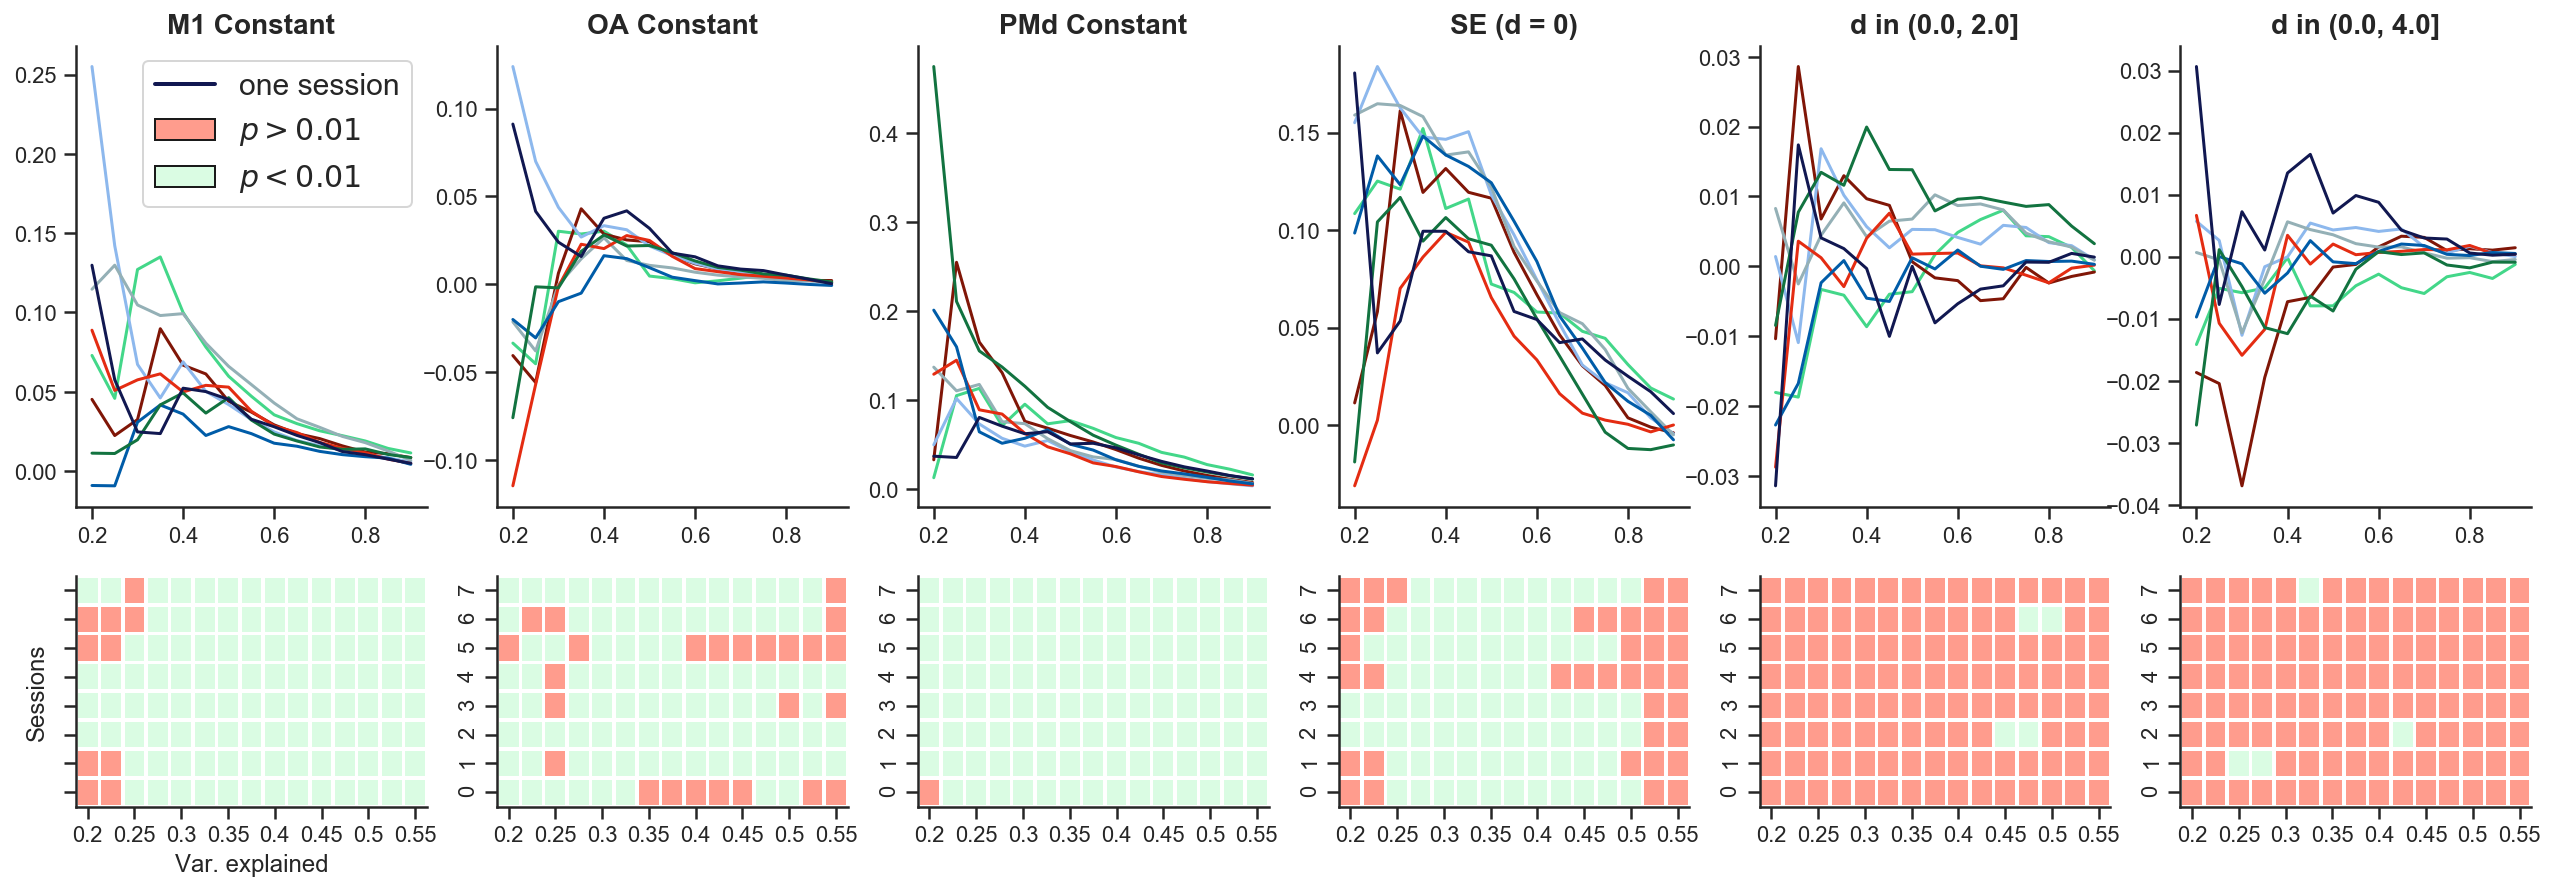

In [113]:
titles = main_dict[s]['vare'][v]['Actual_within'].params.keys()
pvals = []

fig, axs = plt.subplots(nrows=2, ncols=6, gridspec_kw={'height_ratios':[2, 1]}, figsize=(22, 7))

for i, s in enumerate(list(main_dict.keys())[:MONKEY_C]):
    
    # Lineplots for each regressor
    axs[0, 0].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within'].params[0] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 0].set_title(f'{titles[0]}', fontweight='bold', fontsize=14)
    
    axs[0, 1].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within'].params[1] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 1].set_title(f'{titles[1]}', fontweight='bold', fontsize=14)
    
    axs[0, 2].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within'].params[2] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 2].set_title(f'{titles[2]}', fontweight='bold', fontsize=14)
    
    axs[0, 3].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within'].params[3] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 3].set_title(f'{titles[3]}', fontweight='bold', fontsize=14)
    
    axs[0, 4].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within'].params[4] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 4].set_title(f'{titles[4]}', fontweight='bold', fontsize=14)
    
    axs[0, 5].plot(THRESHOLDS_VARE, [main_dict[s]['vare'][v]['Actual_within'].params[5] for v in main_dict[s]['vare'].keys()], color=cs[i])
    axs[0, 5].set_title(f'{titles[5]}', fontweight='bold', fontsize=14)
    
    pvals.append([main_dict[s]['vare'][v]['Actual_within'].pvalues.values for v in main_dict[s]['vare'].keys()])

pvals = np.array(pvals)
    
# Heatmaps for respective p values
sns.heatmap(pvals[:, :, 0] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 0])
axs[1, 0].set_ylim([0, MONKEY_C])
axs[1, 0].set_xticklabels(THRESHOLDS_VARE)
axs[1, 0].set_yticklabels([])
axs[1, 0].set_xlabel('Var. explained')    
axs[1, 0].set_ylabel('Sessions')

sns.heatmap(pvals[:, :, 1] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 1])
axs[1, 1].set_ylim([0, MONKEY_C])
axs[1, 1].set_xticklabels(THRESHOLDS_VARE)

sns.heatmap(pvals[:, :, 2] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 2])
axs[1, 2].set_ylim([0, MONKEY_C])
axs[1, 2].set_xticklabels(THRESHOLDS_VARE)

sns.heatmap(pvals[:, :, 3] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 3])
axs[1, 3].set_ylim([0, MONKEY_C])
axs[1, 3].set_xticklabels(THRESHOLDS_VARE)

sns.heatmap(pvals[:, :, 4] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 4])
axs[1, 4].set_ylim([0, MONKEY_C])
axs[1, 4].set_xticklabels(THRESHOLDS_VARE)

sns.heatmap(pvals[:, :, 5] < 0.01, cmap=cmap, linewidths=1.3, cbar=False, ax=axs[1, 5])
axs[1, 5].set_ylim([0, MONKEY_C])
axs[1, 5].set_xticklabels(THRESHOLDS_VARE)

legend_elements = [Line2D([0], [0], color=cs[7], lw=2, label='one session'),
                   Patch(facecolor='#ff9c8d', edgecolor='k', label=r'$p > 0.01$'),
                   Patch(facecolor='#dafce3', edgecolor='k', label=r'$p < 0.01$'),]
axs[0, 0].legend(handles=legend_elements, prop={'size': 15})

sns.despine()

### 1.3 Within intervals separate

## 2 Make violin plots

In [1]:
# ''' Concatenate surrogate and real data dfs, make violins '''

# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#69A5FF', '#DCDFE3'])
# plt.rcParams['axes.labelsize'] = 16

# for s in main_dict.keys(): # for all sessions
    
#     print(sessions[s])
    
#     df_emp_and_surr = pd.concat([sessions_dfs[s], sessions_dfs_surr[s]])
#     fig, axs = plt.subplots(1, 2, figsize=(17, 6))

#     sns.violinplot(x='category', y='correlation', hue='Type', data=df_emp_and_control, inner='quartile', 
#                 split=True, order=['same electrode', 'same array', 'other array'], legend=False, ax=axs[0])

#     sns.violinplot(x='within distance', y='correlation', hue='Type', data=df_emp_and_control, inner='quartile',
#                 split=True, order=['0', '(0, 2]','(2, 4]', '(4, inf)'], ax=axs[1], legend=True)

#     axs[0].set_ylim=(-1, 1.1)
#     axs[0].get_legend().remove()
#     axs[0].set_ylabel(r'$\rho$')
#     axs[1].set_ylim=(-1, 1.1)
#     axs[1].set_ylabel(r'$\rho$')
#     axs[1].legend(bbox_to_anchor=(1.3, 1))

#     # Make means different color
#     for l in axs[0].lines[1::3]:
#         l.set_linewidth(1.3)
#         l.set_color('#000000')

#     for l in axs[1].lines[1::3]:
#         l.set_linewidth(1.3)
#         l.set_color('#000000')
#     sns.despine(), plt.show()